## import

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy.linalg as lng # linear algebra from scipy library
from scipy.spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 3 Solve the Rigde regression problem and examine Bias and Variance for Ridge:

> (a) Derive (using pen and paper) the ridge regression solution by, as you would when minimizing any differentiable analytical function, differentiating $∥{\bf y} − {\bf X}β∥ + ∥β∥_2$ with respect to $β$, setting to zero and solving for $β$. That is, solve
$\frac{∂}{∂β} [∥y−Xβ∥_2^2+λ∥β∥_2^2]= 0$ for $β$.

<span style="color:yellow"> Se Sebbes iPad

> (b) Compute ridge-regression solutions for the diabetes data set for 100 values of the regularization parameter in the range $10^{−4}$ to $10^3$. Plot the solutions as a function of this parameter. In the next lecture you will learn how to choose a single parameter value which suits the problem at hand.

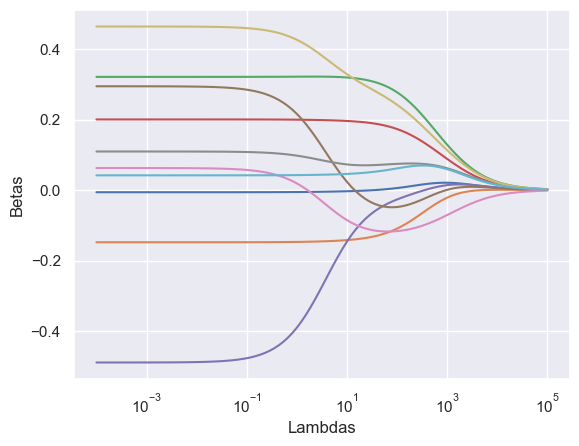

In [12]:
# Create a method that computes the betas in ridge regression analytically
# given the design matrix, lambdas, number of independent variables
# and dependent values
def ridgeMulti(X, _lambda, p, y):
    betas = [np.linalg.inv(X.T@X + lam*np.eye(p))@X.T@y for lam in _lambda]
    return np.array(betas)



# make list of lambda values.
lamb = np.logspace(start=-4, stop=5, num=100, base=10.0)

# run ridge for all lambda values
betas = ridgeMulti(X, lamb, p, y)

# plot results
plt.figure()
plt.semilogx(lamb, betas)
plt.xlabel("Lambdas")
plt.ylabel("Betas")
plt.show()

How does the parameter estimates change when the regularization parameter increase?

What does this mean in terms of the bias of the model?


<span style="color:yellow"> When the regularization parameter increases, the parameters converges to 0. This leads to an increase in bias.

> (c) Change the experiment in exercise 2 to investigate bias and variance for ridge regression instead of OLS. Can you lower the variance without introducing too much bias?

In [18]:
# Create a function that takes n and p as parameters and returns an estimate of the betas
def ridgeMulti(X, _lambda, p, y):
    inner_prod = np.linalg.inv(np.matmul(X.T, X) + _lambda * np.eye(p,p))
    outer_prod = np.matmul(X.T, y)
    betas = np.matmul(inner_prod, outer_prod)
    return betas

def estimate_betas(n, p, beta_true, sigma, _lambda):
    """

    Parameters:
    n (int): number of observations
    p (int): number of features
    true_betas (array): array of ture betas

    Returns:
    true_betas: the estimated betas

   """
    variance = 1.0
    mu = 0.0
    # feature matrix
    X = np.random.normal(mu, variance, size=(n, p)) # random from N(0,1)

    y = np.matmul(X, beta_true) + np.random.normal(mu, sigma, size=n) # Measures response - true value plus noise level
    beta = ridgeMulti(X, _lambda, p, y) # Estimates

    return beta


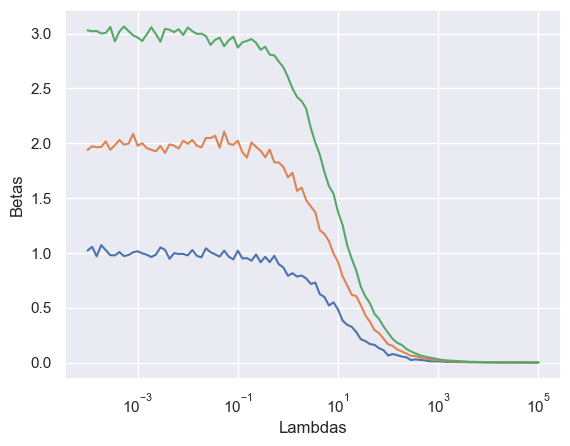

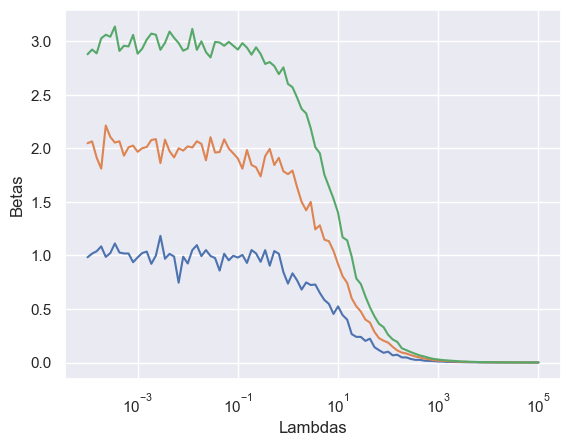

In [19]:
n = 10 # nr of obs
p = 3 # features / vars
beta_true = np.array([1, 2, 3])
X = np.random.randn(n, p) # random drawing, feature matrix

m = 100 # nr of experiments
k = len(lamb)

betas2 = np.zeros((k, p, m)) # all variable estimates

for i in range (1,3):
    sigma = i
    for j in range(k):
        _lambda = lamb[j]
        for l in range(m):
            betas2[j, :, l] = estimate_betas(n, p, beta_true, sigma, _lambda)
    
    betas_mean = np.mean(betas2, axis = 2)

    plt.figure()
    plt.semilogx(lamb, betas_mean)
    plt.xlabel("Lambdas")
    plt.ylabel("Betas")
    plt.show()

What happens with the bias and variance as the regularization parameter increase?

<span style="color:yellow"> As the regularization parameter increases, the bias increases and the variance decreases.